In [150]:
##on trace le diagramme de "distance" entre les modèles pour illustrer notre edm.
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Save just the portion _inside_ the second axis's boundaries
#extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig('ax2_figure.png', bbox_inches=extent)

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
#fig.savefig('ax2_figure_expanded.png', bbox_inches=extent.expanded(1.1, 1.2))

[]

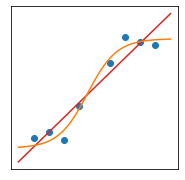

In [17]:
#déjà on se donne les observations et les deux prédictions de modèle qui peuvent être acceptables dans 2 cas.
X=np.linspace(0,1,200)
Xobs=np.array([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9])
Yobs=np.array([0.1,0.15,0.08,0.4,0.8,1.05,1.0,0.97])
def f1(x):
    a=1.395
    b=-0.12875
    return a*x+b

def f2(x):
    a=1.03
    b=115.563
    t=-10.4411
    return a/(1+b*np.exp(t*x))

fig,ax=plt.subplots(figsize=(3,3))
ax.scatter(Xobs,Yobs)
ax.plot(X,f1(X),color='tab:red')
ax.plot(X,f2(X),color='tab:orange')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])


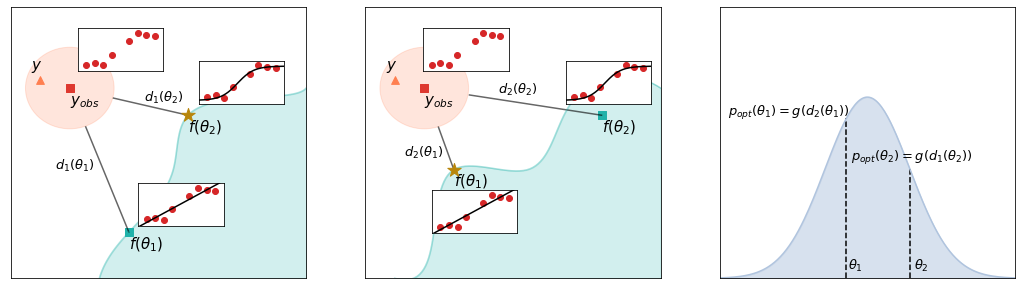

In [273]:
xmod1=0.4
ymod1=0.17
xmod2=0.6
ymod2=0.6
xobs=0.2
yobs=0.7
xtrue=0.1
ytrue=0.73
#construction de la figure
ps=60


fig,(ax,axp,axo)=plt.subplots(ncols=3,figsize=(18,5))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
axp.set_xlim([0,1])
axp.set_ylim([0,1])
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
axp.get_xaxis().set_ticks([])
axp.get_yaxis().set_ticks([])
axo.get_xaxis().set_ticks([])
axo.get_yaxis().set_ticks([])


ax.scatter(xobs,yobs,marker='s',s=ps,color='tab:red')#observations
ax.scatter(xtrue,ytrue,marker='^',s=ps,color='coral')#truth
ax.scatter(xmod1,ymod1,marker='s',s=ps,color='lightseagreen')#model 1
a1=0.73
a2=0.63
ax.plot([xmod1,xmod1+a1*(xobs-xmod1)],[ymod1,ymod1+a1*(yobs-ymod1)],color='black',alpha=0.6)
ax.plot([xmod2,xmod2+a2*(xobs-xmod2)],[ymod2,ymod2+a2*(yobs-ymod2)],color='black',alpha=0.6)


circle=plt.Circle((xobs,yobs),0.15,color='coral',alpha=0.2)
ax.add_patch(circle)

#ajout des axes. structure : left,bottom,width,height. en proportion de la taille de figure
rect1=[xmod1/3+0.09,ymod1+0.1,0.066,0.12]
axmod1=fig.add_axes(rect1)
axmod1.get_xaxis().set_ticks([])
axmod1.get_yaxis().set_ticks([])
axmod1.scatter(Xobs,Yobs,color='tab:red')
axmod1.plot(X,f1(X),color='black')
axmod1.set_xlim([0,1])
axmod1.set_ylim([-0.1,1.2])

rect2=[xmod2/3+0.07,ymod2+0.01,0.066,0.12]
axmod2=fig.add_axes(rect2)
axmod2.get_xaxis().set_ticks([])
axmod2.get_yaxis().set_ticks([])
axmod2.scatter(Xobs,Yobs,color='tab:red')
axmod2.plot(X,f2(X),color='black')
axmod2.set_xlim([0,1])
axmod2.set_ylim([-0.1,1.2])


rect3=[xobs/3+0.11,yobs,0.066,0.12]
axmod3=fig.add_axes(rect3)
axmod3.get_xaxis().set_ticks([])
axmod3.get_yaxis().set_ticks([])
axmod3.scatter(Xobs,Yobs,color='tab:red')
axmod3.set_xlim([0,1])
axmod3.set_ylim([-0.1,1.2])

#annotations
ts=13
d=0.06
ax.annotate(r'$f(\theta_1)$',xy=(xmod1,ymod1-d),xycoords='data',size=ts+2)
ax.annotate(r'$f(\theta_2)$',xy=(xmod2,ymod2-d),xycoords='data',size=ts+2)
ax.annotate(r'$y_{obs}$',xy=(xobs,yobs-d),xycoords='data',size=ts+2)
ax.annotate(r'$y$',xy=(xtrue-0.03,ytrue+0.04),xycoords='data',size=ts+2)
ax.annotate(r'$d_1(\theta_1)$',xy=(0.15,0.4),xycoords='data',size=ts)
ax.annotate(r'$d_1(\theta_2)$',xy=(0.45,0.65),xycoords='data',size=ts)

#création de la spline parce que c'est cool.
nodes = np.array( [ [0.3, 0], [xmod1, ymod1], [0.55, 0.4], [xmod2, ymod2], [0.7,0.65],[1, 0.7] ] )

x = nodes[:,0]
y = nodes[:,1]

tck,u     = interpolate.splprep( [x,y] ,s = 0 )
xnew,ynew = interpolate.splev( np.linspace( 0, 1, 100 ), tck,der = 0)
ax.plot(xnew,ynew,color='lightseagreen',alpha=0.4)
ax.fill_between(xnew,ynew,color='lightseagreen',alpha=0.2)
ax.scatter(xmod2,ymod2,marker='*',s=ps+140,color='darkgoldenrod',zorder=10)#model 2



############################## second graph
xmod1=0.3
ymod1=0.4
xmod2=0.8
ymod2=0.6
xobs=0.2
yobs=0.7
xtrue=0.1
ytrue=0.73

axp.scatter(xobs,yobs,marker='s',s=ps,color='tab:red')#observations
axp.scatter(xtrue,ytrue,marker='^',s=ps,color='coral')#truth
axp.scatter(xmod2,ymod2,marker='s',s=ps,color='lightseagreen')#model 1
a1=0.52
a2=0.745
axp.plot([xmod1,xmod1+a1*(xobs-xmod1)],[ymod1,ymod1+a1*(yobs-ymod1)],color='black',alpha=0.6)
axp.plot([xmod2,xmod2+a2*(xobs-xmod2)],[ymod2,ymod2+a2*(yobs-ymod2)],color='black',alpha=0.6)

circle=plt.Circle((xobs,yobs),0.15,color='coral',alpha=0.2)
axp.add_patch(circle)

#ajout des axes. structure : left,bottom,width,height. en proportion de la taille de figure
rect1=[2*xmod1/3+0.25,0.25,0.066,0.12]
axmod1=fig.add_axes(rect1)
axmod1.get_xaxis().set_ticks([])
axmod1.get_yaxis().set_ticks([])
axmod1.scatter(Xobs,Yobs,color='tab:red')
axmod1.plot(X,f1(X),color='black')
axmod1.set_xlim([0,1])
axmod1.set_ylim([-0.1,1.2])

rect2=[2*xmod2/3+0.02,ymod2+0.01,0.066,0.12]
axmod2=fig.add_axes(rect2)
axmod2.get_xaxis().set_ticks([])
axmod2.get_yaxis().set_ticks([])
axmod2.scatter(Xobs,Yobs,color='tab:red')
axmod2.plot(X,f2(X),color='black')
axmod2.set_xlim([0,1])
axmod2.set_ylim([-0.1,1.2])


rect3=[2*xobs/3+0.31,yobs,0.066,0.12]
axmod3=fig.add_axes(rect3)
axmod3.get_xaxis().set_ticks([])
axmod3.get_yaxis().set_ticks([])
axmod3.scatter(Xobs,Yobs,color='tab:red')
axmod3.set_xlim([0,1])
axmod3.set_ylim([-0.1,1.2])

#annotations
ts=13
d=0.06
axp.annotate(r'$f(\theta_1)$',xy=(xmod1,ymod1-d),xycoords='data',size=ts+2)
axp.annotate(r'$f(\theta_2)$',xy=(xmod2,ymod2-d),xycoords='data',size=ts+2)
axp.annotate(r'$y_{obs}$',xy=(xobs,yobs-d),xycoords='data',size=ts+2)
axp.annotate(r'$y$',xy=(xtrue-0.03,ytrue+0.04),xycoords='data',size=ts+2)
axp.annotate(r'$d_2(\theta_1)$',xy=(0.13,0.45),xycoords='data',size=ts)
axp.annotate(r'$d_2(\theta_2)$',xy=(0.45,0.68),xycoords='data',size=ts)

#création de la spline parce que c'est cool.
nodes = np.array( [ [0.1, 0],[0.25, 0.3], [xmod1, ymod1], [0.55, 0.4],  [0.7,0.65],[0.8, 0.73],[1, 0.7] ] )

x = nodes[:,0]
y = nodes[:,1]

tck,u     = interpolate.splprep( [x,y] ,s = 0 )
xnew,ynew = interpolate.splev( np.linspace( 0, 1, 100 ), tck,der = 0)
axp.plot(xnew,ynew,color='lightseagreen',alpha=0.4)
axp.fill_between(xnew,ynew,color='lightseagreen',alpha=0.2)
axp.scatter(xmod1,ymod1,marker='*',s=ps+140,color='darkgoldenrod',zorder=10)#model 2

def gauss(x):
    return np.exp(-x**2/2)
XO=np.linspace(-3.5,3.5,200)
axo.plot(XO,gauss(XO),color='lightsteelblue')
axo.fill_between(XO,gauss(XO),color='lightsteelblue',alpha=0.5)
axo.set_xlim(-3.5,3.5)
axo.set_ylim(0,1.5)

axo.vlines(-0.5,0,gauss(-0.5),linestyle='dashed')
axo.vlines(1,0,gauss(-1),linestyle='dashed')
axo.annotate(r'$\theta_1$',xy=(-0.45,0.05),xycoords='data',size=ts)
axo.annotate(r'$\theta_2$',xy=(1.1,0.05),xycoords='data',size=ts)
axo.annotate(r'$p_{opt}(\theta_1)=g(d_2(\theta_1))$',xy=(-3.3,0.9),xycoords='data',size=ts)
axo.annotate(r'$p_{opt}(\theta_2)=g(d_1(\theta_2))$',xy=(-0.4,0.65),xycoords='data',size=ts)

#sauvegarde de figures
# Pad the saved area by 10% in the x-direction and 20% in the y-direction

extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('illu_edm1.png', bbox_inches=extent.expanded(1.05, 1.05))
extent = axp.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('illu_edm2', bbox_inches=extent.expanded(1.05, 1.05))
extent = axo.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('illu_edm3.png', bbox_inches=extent.expanded(1.05, 1.05))



TypeError: cannot unpack non-iterable AxesSubplot object

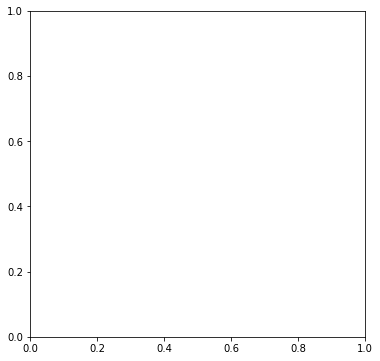